<font size=4 color='blue'>

# <center> Clase 11, julio 28, 2021 </center>


<font size=5 color="blue">

Deep Learning using LeNet and AlexNet

<font size=4 color="black">
    
[Comment: LeNet and AlexNet](https://d2l.ai/chapter_convolutional-modern/alexnet.html#fig-alexnet)

<font size=5 color="black">

LeNet

<img src="./images/cnn-image.jpeg" width=620 height=620 align = "center" >

<font size=4 color="black">
    
LeNet: these networks have a large number of weights and biases; overfitting should be attended

<font size=4 color="black">
    
[Article: LeNet](./literature/LeNet_lecun-1999.pdf)

<font size=3 color="black">

## AlexNet



<img src="./images/AlexNet-1.png" width=620 height=620 align = "center" >


<font size=4 color="black">
    
[Article: AlexNet](./literature/alexnet-paper.pdf)

<font size=2 color="black">

## A method to reduce overfitting: Data Augmentation

<img src="./images/1024px-Regularization.svg.png" width=300 height=300 align = "left" > 
 <img src="./images/six-augmented-2.png" width=520 height=520 align = "center" > 


<font size=2 color="black">

## Data Augmentation
    
<font size=4 color="black"> 
    
[Article: Data Augmentation overview](./literature/SurvayData-Augm-DL_2019.pdf)    

$$ $$   
Deep networks are heavily reliant on big data to avoid overfitting:
    
Transforming an image
    
    
<img src="./images/transforming-a-dog.png" width=520 height=520 align = "center" > 


Transforming a curve
    
<img src="./images/curve-data-augmentation.png" width=520 height=520 align = "center" > 
  

<font size=4 color="black">
    
[Keras: Image Preprocessing](https://keras.io/preprocessing/image/)

<font size=2 color="black">

## Another way of reducing overfitting is using batch normalization
    
<font size=4 color="black">


<font size=4 color="black">
$$ $$
    
[Article: Batch normalization](./literature/Batch-normalization_2015.pdf)
    
<img src="./images/batch-normalization.png" width=520 height=520 align = "center" >     

$$ $$    

<font size=4 color="black">
    
Batch normalization helps to reduce the overfitting and accelerates the convergence of the network during training        
<img src="./images/batch-normalization-formula.png" width=520 height=520 align = "center" > 


<font size=5 color="blue">

Deep Learning: LeNet 

<font size=4 color='red'>
If you use tensorflow-GPU, run the following cell

In [1]:
import tensorflow as tf

physical_devices = tf.config.experimental.list_physical_devices('GPU')
print("physical_devices-------------", len(physical_devices))
tf.config.experimental.set_memory_growth(physical_devices[0], True)

physical_devices------------- 1


In [2]:
from platform import python_version
import pkg_resources
def version_library(programa):
    return pkg_resources.get_distribution(programa).version
programas=['numpy', 'tensorflow']

import itertools
from itertools import product
for v in product(iter(programas)):
    print(v[0])
    try:
        print(version_library(v[0]))
    except Exception as e: print(e)

numpy
1.20.1
tensorflow
2.4.1


In [3]:
import numpy as np
import matplotlib.pyplot as plt

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, Activation, Dropout, Flatten, MaxPooling2D
from tensorflow.keras.layers import BatchNormalization 
from tensorflow.keras.utils import plot_model
from tensorflow.keras import optimizers

import time

np.random.seed(10)

In [4]:
print("Numpy version", np.__version__)
print("TensorFlow version", tf.__version__)
print("Keras version", keras.__version__)
from platform import python_version
print("Python version", python_version())

Numpy version 1.20.1
TensorFlow version 2.4.1
Keras version 2.4.0
Python version 3.9.0


<font size=5 color='blue'>
Tensorboard with Jupyter Notebooks

In [5]:
# Load the TensorBoard notebook extension
%load_ext tensorboard

# Clear any logs from previous runs
!rm -rf ./logs/

<font size=2 color="black">

## Data of the System to be analyzed: mnist

<font size=4 color="black"> 
    
[The MNIST database](http://yann.lecun.com/exdb/mnist/)

<img src="./images/MnistExamples-1.png" width=300 height=300 align = "center" >

<font size=2 color='black'>

##  Generation or extraction of the raw data
  

In [6]:
from tensorflow.keras.datasets import mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()

In [7]:
print("x_train, y_train type", type(x_train), type(y_train))
print("x_test, y_test type", type(x_test), type(y_test))

x_train, y_train type <class 'numpy.ndarray'> <class 'numpy.ndarray'>
x_test, y_test type <class 'numpy.ndarray'> <class 'numpy.ndarray'>


In [8]:
print("x_train shape", x_train.shape)
print("y_train shape", y_train.shape)
print("x_test shape", x_test.shape)
print("y_test shape", y_test.shape)

x_train shape (60000, 28, 28)
y_train shape (60000,)
x_test shape (10000, 28, 28)
y_test shape (10000,)


<font size=2 color='black'>

##  Analysis of the raw data
  

8


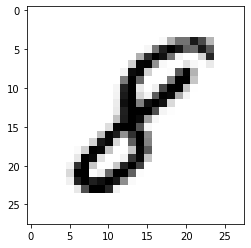

In [9]:
image_index = 7777 # You may select anything up to 60,000
print(y_train[image_index]) # The label is 8
plt.imshow(x_train[image_index], cmap='Greys')
plt.show()

<font size=2 color='black'>

##  Transformation of the raw data 
  

In [10]:
# Reshaping the array to 4-dims so that it can work with the Keras API
x_train = x_train.reshape(x_train.shape[0], 28, 28, 1)
x_test = x_test.reshape(x_test.shape[0], 28, 28, 1)
#input_shape = (28, 28, 1)

# Making sure that the values are float so that we can get decimal points after division
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')

# Normalizing the RGB codes by dividing it to the max RGB value.
x_train /= 255.0
x_test /= 255.0
print('x_train shape:', x_train.shape)
print('y_train shape:', y_train.shape)
print('x_test shape:', x_test.shape)
print('y_test shape:', y_test.shape)

x_train shape: (60000, 28, 28, 1)
y_train shape: (60000,)
x_test shape: (10000, 28, 28, 1)
y_test shape: (10000,)


In [11]:
y_train[0:15]

array([5, 0, 4, 1, 9, 2, 1, 3, 1, 4, 3, 5, 3, 6, 1], dtype=uint8)

<font size=2 color='black'>

##  Definition of the neural network architecture
  

In [12]:
# Creating a Sequential Model and adding the layers

def architecture(batch_normalization, dropout, input_shape, activation):
    model = Sequential()
    model.add(Conv2D(32, kernel_size=(5,5), input_shape=input_shape))
    
    model.add(MaxPooling2D(pool_size=(2, 2)))
    if batch_normalization:
        model.add(BatchNormalization())    #The recomendaton is to perform batch normalization before activation
    
    model.add(Conv2D(64, kernel_size=(5,5), input_shape=input_shape))
    
    model.add(MaxPooling2D(pool_size=(2, 2)))
    
    model.add(Flatten()) # Flattening the 2D arrays for fully connected layers
    
    model.add(Dense(1024))
    if dropout:
        model.add(Dropout(0.2))
    if batch_normalization:
        model.add(BatchNormalization())  #The recomendaton is to perform batch normalization before activation
    model.add(Activation(activation))

    model.add(Dense(10,activation='softmax'))
    
    return model

<font size=2 color='black'>

##  Generating a model of deep neural network 
  

<font size=4 color='black'>

Playing with batch normalization and dropout, you will see that batch normalization improves better the network. Remember that batch normalization is applied before the activation. 
    
[Paper: Batch Normalization](./literature/Batch-normalization_2015.pdf)

In [13]:
batch_normalization=True
dropout=False
input_shape = (28, 28, 1)
activation = 'relu'

LeNet_model = architecture(batch_normalization, dropout, input_shape, activation)


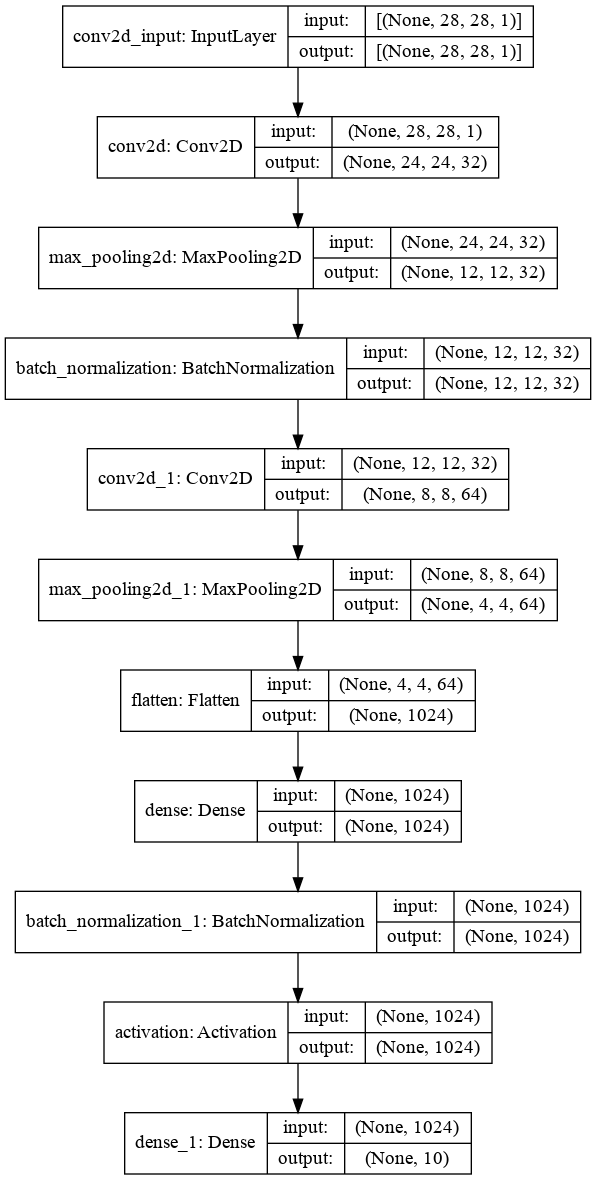

In [14]:
# Plotting the architecture

plot_model(LeNet_model, to_file='LeNet.png', show_shapes=True, show_layer_names=True)

In [15]:
LeNet_model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 24, 24, 32)        832       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 12, 12, 32)        0         
_________________________________________________________________
batch_normalization (BatchNo (None, 12, 12, 32)        128       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 8, 8, 64)          51264     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 4, 4, 64)          0         
_________________________________________________________________
flatten (Flatten)            (None, 1024)              0         
_________________________________________________________________
dense (Dense)                (None, 1024)              1

<font size=4 color='blue'>
    
[Keras: compiling methods](https://keras.io/models/model/#compile)

<font size=2 color='black'>

##  Compiling the model 
  

In [16]:
#Compiling the model

lr = 0.001

LeNet_model.compile(optimizer=optimizers.Adam(learning_rate=lr,beta_1=0.9, beta_2=0.999, amsgrad=False),
              loss='sparse_categorical_crossentropy', metrics=['accuracy']) 

<font size=2 color='black'>

##  Running the model 
  

In [17]:
start_time = time.time()

validation_split = 0.16
batch_size = 256
num_epochs=20

tensorboard_callback = keras.callbacks.TensorBoard(
    log_dir="logs/LeNet", histogram_freq=1)
#sustituir por log_dir="logs\LeNet"  en caso de usar windows  


history = LeNet_model.fit(x_train, y_train, batch_size=batch_size, epochs=num_epochs,
                          validation_split=validation_split, shuffle=True,
                          callbacks=[tensorboard_callback], verbose=1)

end_time = time.time()
print("Time for training: {:10.4f}s".format(end_time - start_time))

Epoch 1/20
197/197 [==============================] - 3s 7ms/step - loss: 0.2519 - accuracy: 0.9198 - val_loss: 2.8724 - val_accuracy: 0.1243
Epoch 2/20
197/197 [==============================] - 1s 5ms/step - loss: 0.0296 - accuracy: 0.9913 - val_loss: 0.3301 - val_accuracy: 0.8858
Epoch 3/20
197/197 [==============================] - 1s 5ms/step - loss: 0.0187 - accuracy: 0.9943 - val_loss: 0.0472 - val_accuracy: 0.9859
Epoch 4/20
197/197 [==============================] - 1s 5ms/step - loss: 0.0125 - accuracy: 0.9965 - val_loss: 0.0398 - val_accuracy: 0.9872
Epoch 5/20
197/197 [==============================] - 1s 5ms/step - loss: 0.0076 - accuracy: 0.9980 - val_loss: 0.0439 - val_accuracy: 0.9875
Epoch 6/20
197/197 [==============================] - 1s 5ms/step - loss: 0.0060 - accuracy: 0.9982 - val_loss: 0.0474 - val_accuracy: 0.9873
Epoch 7/20
197/197 [==============================] - 1s 5ms/step - loss: 0.0063 - accuracy: 0.9980 - val_loss: 0.0608 - val_accuracy: 0.9832
Epoch 

In [18]:
LeNet_model.save('LeNet_model.h5')

<font size=2 color='black'>

##  Plotting the loss function 
  

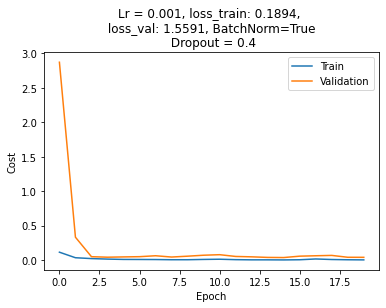

In [19]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Lr = 0.001, loss_train: 0.1894, \n loss_val: 1.5591, BatchNorm=True \n Dropout = 0.4')
plt.ylabel('Cost')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper right')
#plt.ylim(top=13)
#plt.ylim(bottom=0)
plt.show()

<font size=2 color='black'>

##  Plotting the accuracy 
  

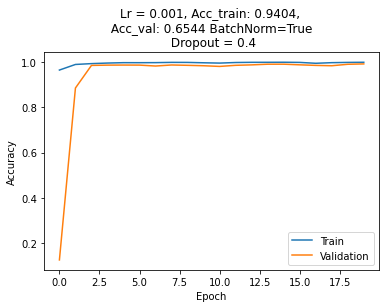

In [20]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Lr = 0.001, Acc_train: 0.9404, \n Acc_val: 0.6544 BatchNorm=True \n Dropout = 0.4')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='lower right')
plt.show()

In [21]:
# Predicting the image associated to the each sample in the test set (X_test)
predictions = LeNet_model.predict(x_test)

In [22]:
print(type(predictions))
print(predictions.shape)

<class 'numpy.ndarray'>
(10000, 10)


In [23]:
sample = 91
print(predictions[sample])
print("\nPredicted digit:", np.argmax(predictions[sample]))

[3.24929428e-12 1.02752605e-13 1.58642048e-13 1.14695135e-12
 1.64172686e-11 1.89209468e-10 1.00000000e+00 5.48874455e-19
 2.85121926e-11 1.25290437e-14]

Predicted digit: 6


<font size=4 color="black"> 
Displaying the image associated to this sample.

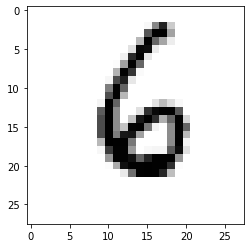

In [24]:
plt.imshow(np.squeeze(x_test[sample]), cmap='Greys')
plt.show()

<font size=5, color=blue>
    Data analysis

<font size=5, color=blue>
    With NETRON
$$ $$
<font size=4, color='black'>
    
[How to extract kernel values](https://shivang-ahd.medium.com/how-to-extract-kernel-values-in-cnn-using-netron-and-generate-feature-maps-82cdb6020bb0)

[NETRON](https://netron.app/)

<font size=5, color=blue>
    With Tensorboard

In [25]:
%tensorboard --logdir logs/LeNet
#logs\LeNet

<font size=3 color="black">

## Deep Learning: AlexNet 

In [26]:
import numpy as np
import matplotlib.pyplot as plt
import time

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Activation, Dense, Flatten
from tensorflow.keras.layers import Activation, Dropout, BatchNormalization
from tensorflow.keras.utils import plot_model
from tensorflow.keras import optimizers

np.random.seed(10)

<font size=2 color="black">

## Data of the System to be analyzed: oxflowers17

<font size=4 color="black"> 
    
[The oxflowers17 database](http://www.robots.ox.ac.uk/~vgg/data/flowers/17/)


    
<font size=4 color="black">
$$ $$
 
<img src="./images/oxflower17.jpg" width=500 height=500 align = "center" >     


<font size=4>
    
[Flower classification](./literature/Flower_Classification_2006.pdf)

<font size=2 color='black'>

##  Generation or extraction of the raw data

In [27]:
samples = np.load('oxflower17.npz')

In [28]:
print(type(samples))

<class 'numpy.lib.npyio.NpzFile'>


In [29]:
samples.files

['X', 'Y']

In [30]:
train_x = samples['X']
train_y = samples['Y']

In [31]:
print(type(train_x), train_x.shape)
print(type(train_y), train_y.shape)

<class 'numpy.ndarray'> (1360, 224, 224, 3)
<class 'numpy.ndarray'> (1360, 17)


In [32]:
print(train_y[:3])

[[0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]]


<font size=2 color='black'>

##  Analysis of the raw data  

 <font size=4 color='black'>   

 The oxflower17 dataset consists of 1360 colour images (224 pixels high and 224 pixes width) of flowers in 17 classes, with 80 images per class. All images will be used for training. Before running the model, it will be indicated the ratio of samples that will be used for validation.


The 17 classes are:
 
| index | class name |
| --- | --- |
| 0 | Daffodil|
| 1 | Snowdrop|
| 2 | Daisy|    
| 3 | ColtsFoot|										
| 4 | Dandelion|										
| 5 | Cowslip|
| 6 | Buttercup|   
| 7 | Windflower|										
| 8 | Pansy|										
| 9 | LilyValley|										
|10 | Bluebell |										
|11 | Crocus|
|12 | Iris|										
|13 | Tigerlily|										
|14 | Tulip|										
|15 | Fritillary|
|16 | Sunflower|										       

<font size=2 color="black">
    
## Viewing one sample from the data sets

<font size=4 color='black'>
    
We define a dictionary to associate the class number to a class name.



In [33]:
dic = {0: 'Daffodil', 1: 'Snowdrop', 2: 'Daisy', 3: 'ColtsFoot', 4: 'Dandelion', \
       5: 'Cowslip', 6: 'Buttercup', 7: 'Windflower', 8: 'Pansy', 9:'LilyValley', \
       10: 'Bluebell', 11: 'Crocus', 12: 'Iris', 13: 'Tigerlily', 14:'Tulip', \
       15: 'Fritillary', 16: 'Sunflower'}

<font size=4 color="black">
    
Next, we show a sample: its target and image.

y = [0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]

y = 3 ; the sample 72 corresponds to a(an) ColtsFoot


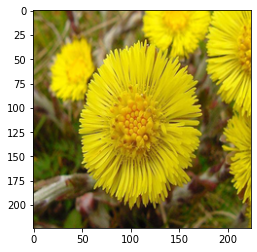

In [34]:
# Plotting the content of a sample

sample = 72

plt.imshow(train_x[sample]);
print('y =',  np.squeeze(train_y[sample]))

for i in [i for i,x in enumerate(train_y[sample]) if x == 1]:
    print('')

print('y =',  i, ';', 'the sample', sample, 'corresponds to a(an)', dic[i])

<font size=2 color='black'>

##  Transformation of the raw data 

In [35]:

print('the shape is', train_x.shape)

the shape is (1360, 224, 224, 3)


In [36]:
print(train_x[0][0:5][0:2])

[[[0.19607843 0.25882354 0.15686275]
  [0.18039216 0.24313726 0.13725491]
  [0.15294118 0.21568628 0.10980392]
  ...
  [0.12941177 0.12156863 0.12156863]
  [0.13725491 0.12941177 0.14117648]
  [0.14509805 0.13725491 0.14901961]]

 [[0.1882353  0.2509804  0.15294118]
  [0.1764706  0.23529412 0.13333334]
  [0.15686275 0.21176471 0.11372549]
  ...
  [0.11372549 0.10588235 0.10588235]
  [0.12941177 0.12156863 0.13333334]
  [0.14117648 0.13333334 0.14509805]]]


<font size=4 color='black'>
$$ $$    
The raw data are renormalized. We do not do anything more

In [37]:
print(train_y[0])

[0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


In [38]:
print('train_y shape:', train_y.shape)

train_y shape: (1360, 17)


In [39]:
from sklearn.model_selection import train_test_split

# Choose your test size to split between training and testing sets:
train_x, test_x, train_y, test_y = train_test_split(train_x,train_y, test_size=0.1, random_state=42)

In [40]:
print(train_x.shape)
print(test_x.shape)
print(train_y.shape)
print(test_y.shape)

(1224, 224, 224, 3)
(136, 224, 224, 3)
(1224, 17)
(136, 17)


<font size=2 color='black'>

##  Definition of the neural network architecture
  

<font size=5 color='black'> 
    
Keras has two different modes to define the architecture:

<font size=4 color='black'>     

1. The sequential model. It is a sequential stack of layers.
$$ $$    
2. The functional API. It is the way to go for defining complex models, such as multi-output models, directed acyclic graphs, or models with shared layers.  
$$ $$

In the present case, we will use the sequential mode for constructing the architecture of the network.
    
[Keras: Sequential model API](https://keras.io/models/sequential/)

<font size=4 color="blac">
    
[Keras: Convolutional layers](https://keras.io/layers/convolutional/)
$$ $$
[Keras: Pooling layers](https://keras.io/layers/pooling/)    
$$ $$
[Keras: Batch Normalization](https://keras.io/layers/normalization/)

In [41]:
# Creating a Sequential Model and adding the layers

def architecture(batch_normalization, dropout, input_shape, activation):
    
    # Creating a sequential model
    model = Sequential()
    
    # 1st Convolutional layer
    model.add(Conv2D(filters=96, activation=activation, input_shape=input_shape,\
      kernel_size=(11,11), strides=(4,4), padding='valid', kernel_initializer='he_uniform'))
    # Pooling
    model.add(MaxPooling2D(pool_size=(2,2), strides=(2,2), padding='valid')) 
    if batch_normalization: 
        model.add(BatchNormalization())  

    # 2nd Convolutional Layer
    model.add(Conv2D(filters=256, activation=activation, kernel_size=(5,5), \
                     strides=(1,1), padding='valid'))
    # Pooling
    model.add(MaxPooling2D(pool_size=(2,2), strides=(2,2), padding='valid'))
    if batch_normalization: 
        model.add(BatchNormalization())  
    
    # 3rd Convolutional Layer
    model.add(Conv2D(filters=384, activation=activation, kernel_size=(3,3), strides=(1,1), padding='valid'))
     
    # 4th Convolutional Layer
    model.add(Conv2D(filters=384, activation=activation, kernel_size=(3,3), strides=(1,1), padding='valid'))
    
    # 5th Convolutional Layer
    model.add(Conv2D(filters=256, activation=activation, kernel_size=(3,3), strides=(1,1), padding='valid'))    
    # Pooling
    model.add(MaxPooling2D(pool_size=(2,2), strides=(2,2), padding='valid'))
    if batch_normalization: 
        model.add(BatchNormalization())   

    # Passing it to a dense layer
    model.add(Flatten())
    if dropout:
        model.add(Dropout(0.5))
    
    # 1st Dense Layer
    model.add(Dense(512, activation=activation, input_shape=(224*224*3,), kernel_initializer = 'he_uniform'))
    # Add Dropout to prevent overfitting
    if dropout:
        model.add(Dropout(0.5))
    if batch_normalization: 
        model.add(BatchNormalization())   
    
    # 2nd Dense Layer
    model.add(Dense(512, activation=activation, kernel_initializer = 'he_uniform'))
    model.add(Activation('relu'))
    # Add Dropout
    if dropout:
        model.add(Dropout(0.5))
    if batch_normalization: 
        model.add(BatchNormalization())   

    # Output Layer
    model.add(Dense(17, activation='softmax'))
              
    return model
            
    

<font size=2 color='black'>

##  Generating a model of deep neural network 


In [42]:
# Generating the model using the defined architecture

batch_normalization=True
dropout=True
one_image = (224, 224, 3)
activation = 'relu'

oxflower17_model = architecture(batch_normalization, dropout, one_image, activation)


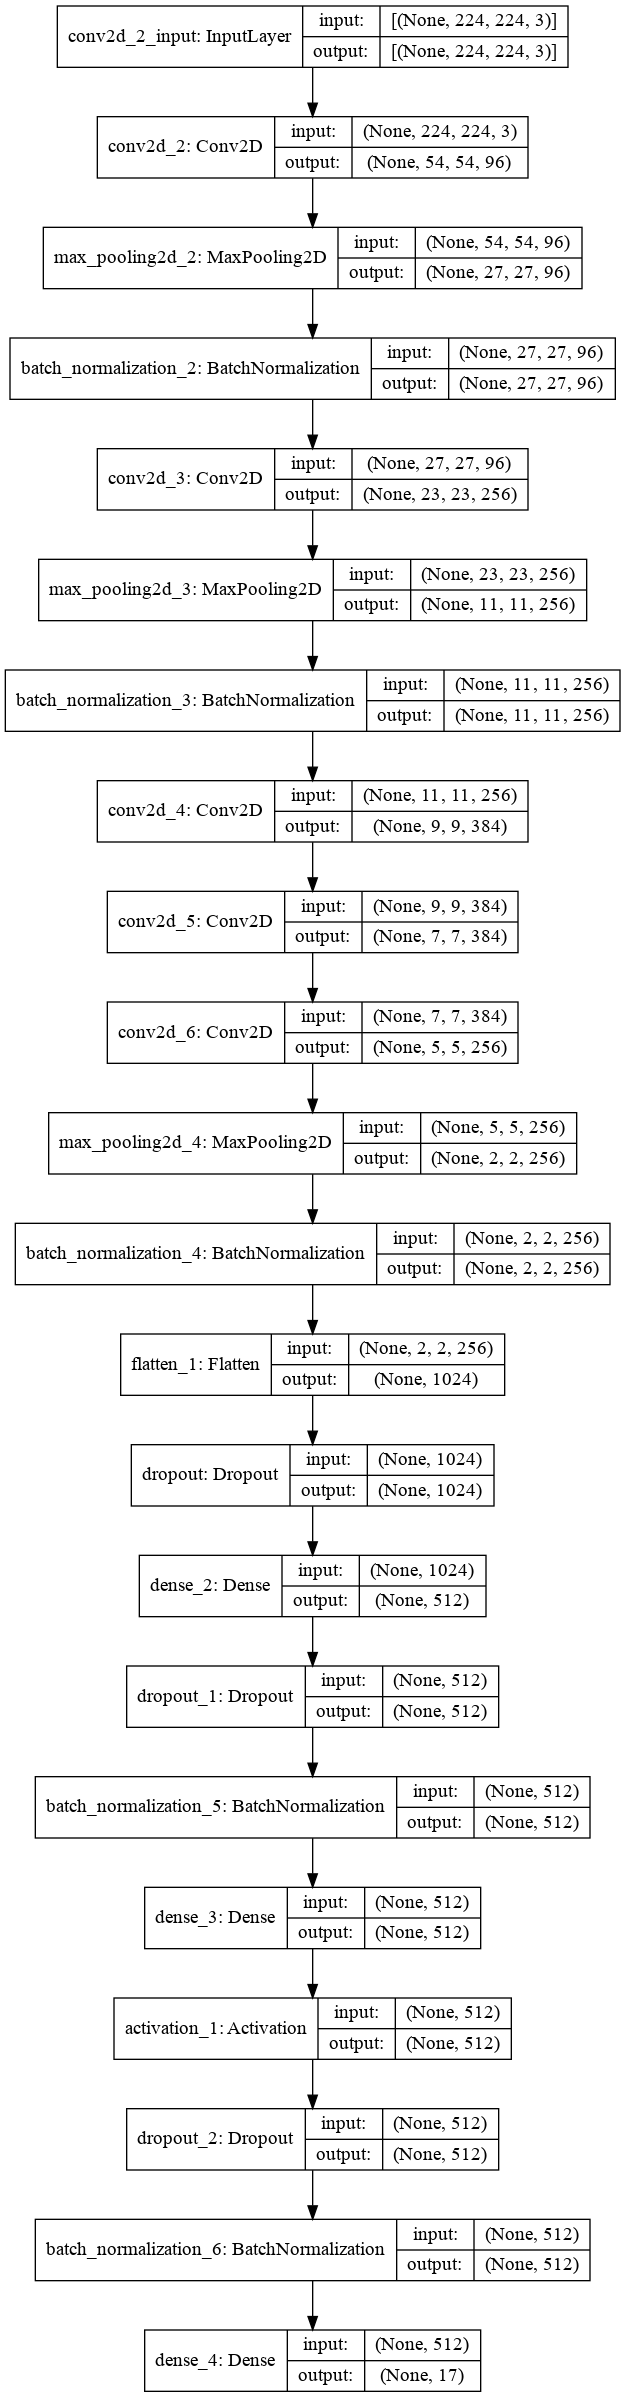

In [43]:
plot_model(oxflower17_model, to_file='oxflower17_model.png', show_shapes=True, show_layer_names=True)

In [44]:

oxflower17_model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_2 (Conv2D)            (None, 54, 54, 96)        34944     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 27, 27, 96)        0         
_________________________________________________________________
batch_normalization_2 (Batch (None, 27, 27, 96)        384       
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 23, 23, 256)       614656    
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 11, 11, 256)       0         
_________________________________________________________________
batch_normalization_3 (Batch (None, 11, 11, 256)       1024      
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 9, 9, 384)        

<font size=2 color='black'>

##  Compiling the model 

In [45]:
#Compiling the model using Adam as optimizer

lr = 0.001  # Learning rate

oxflower17_model.compile(loss='categorical_crossentropy', metrics=['accuracy'], \
optimizer=optimizers.Adam(learning_rate=lr,beta_1=0.9, beta_2=0.999, amsgrad=False))


<font size=2 color='black'>

##  Running the model    

In [46]:
start_time = time.time()

batch_size=128
num_epochs = 50


tensorboard_callback = keras.callbacks.TensorBoard(
    log_dir="logs/oxflower17", histogram_freq=1)
#sustituir por log_dir="logs\oxflower17"  en caso de usar windows

history = oxflower17_model.fit(train_x, train_y, batch_size=batch_size, epochs=num_epochs,
                               validation_data=(test_x,test_y), shuffle=True,
                               callbacks=[tensorboard_callback], verbose=1)

end_time = time.time()
print("Time for training: {:10.4f}s".format(end_time - start_time))

Epoch 1/50
10/10 [==============================] - 3s 173ms/step - loss: 3.3787 - accuracy: 0.0925 - val_loss: 62.7907 - val_accuracy: 0.0588
Epoch 2/50
10/10 [==============================] - 1s 85ms/step - loss: 2.8299 - accuracy: 0.1644 - val_loss: 65.4997 - val_accuracy: 0.0588
Epoch 3/50
10/10 [==============================] - 1s 85ms/step - loss: 2.4877 - accuracy: 0.2289 - val_loss: 36.4485 - val_accuracy: 0.0588
Epoch 4/50
10/10 [==============================] - 1s 86ms/step - loss: 2.3225 - accuracy: 0.2549 - val_loss: 31.7372 - val_accuracy: 0.0588
Epoch 5/50
10/10 [==============================] - 1s 85ms/step - loss: 2.0567 - accuracy: 0.3462 - val_loss: 12.8877 - val_accuracy: 0.1765
Epoch 6/50
10/10 [==============================] - 1s 86ms/step - loss: 1.8510 - accuracy: 0.3998 - val_loss: 7.2021 - val_accuracy: 0.1985
Epoch 7/50
10/10 [==============================] - 1s 85ms/step - loss: 1.7182 - accuracy: 0.4177 - val_loss: 5.0533 - val_accuracy: 0.2279
Epoch 8

In [47]:
oxflower17_model.save('oxflower17_model.h5')

<font size=4 color="black">
    
* Note: if you run `fit()` again, the `model` will continue training, starting with the parameters it has already learnt, instead of reinitializing them.


<font size=2 color='black'>

##  Plotting the loss function 

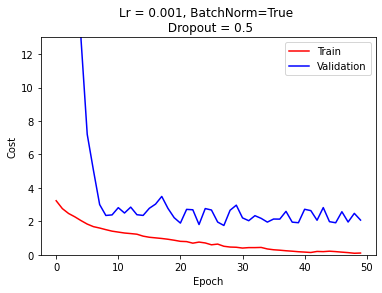

In [48]:
plt.plot(history.history['loss'], color='red')
plt.plot(history.history['val_loss'], color='blue')
plt.title('Lr = 0.001, BatchNorm=True \n Dropout = 0.5')
plt.ylabel('Cost')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper right')
plt.ylim(top=13)    # The instruction is used to limit the upper value of the loss function 
plt.ylim(bottom=0)  # The instruction is used to limit the lower value of the loss function
plt.show()

<font size=2 color='black'>

##  Plotting the accuracy 

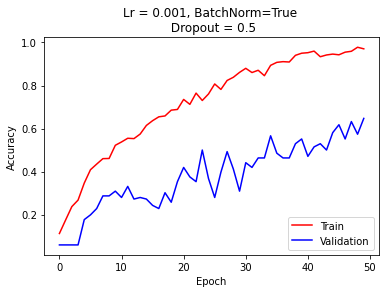

In [49]:
plt.plot(history.history['accuracy'], color='red')
plt.plot(history.history['val_accuracy'], color='blue')
plt.title('Lr = 0.001, BatchNorm=True \n Dropout = 0.5')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='lower right')
plt.show()

<font size=5, color=blue>
    Data analysis

<font size=5, color=blue>
    With NETRON

[NETRON](https://netron.app/)

<font size=5, color=blue>
    With Tensorboard

In [50]:
%tensorboard --logdir logs/oxflower17
#logs\oxflower17

<font size=2 color="black">
    
## Data augmentation

<font size=4 color="black">
$$ $$
shear_range, zoom_range, and horizontal_flip are some of the parameter available in Keras that define the transformation of the images

[Keras: Data augmetation](https://keras.io/preprocessing/image/)


<font size=2 color='black'>

##  Generating a model of deep neural network 


In [51]:
# Generating the model using the defined architecture

batch_normalization=True
dropout=True
one_image = (224, 224, 3)
activation = 'relu'

oxflower17_augm = architecture(batch_normalization, dropout, one_image, activation)


<font size=2 color='black'>

##  Compiling the model 

In [52]:
#Compiling the model using Adam as optimizer

lr = 0.001  # Learning rate

oxflower17_augm.compile(loss='categorical_crossentropy', metrics=['accuracy'], \
optimizer=optimizers.Adam(learning_rate=lr,beta_1=0.9, beta_2=0.999, amsgrad=False))


In [53]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(
    shear_range = 0.2,
    zoom_range = 0.2,
    horizontal_flip = True
)

<font size=2 color='black'>

##  Running the model    

<font size=4 color="black">

[Comment: Keras flow method](https://theailearner.com/2019/07/06/imagedatagenerator-flow-method/)

<font size=4 color="black">
This process requires long times, depending of the number of steps per epoch, the number of epochs and the number of images that will be generated during the data augmentation (batch_size) 

In [54]:
# compute quantities required for featurewise normalization
# (std, mean, and principal components if ZCA whitening is applied)
train_datagen.fit(train_x)

train_generator = train_datagen.flow(
    train_x,
    train_y,
    batch_size = 32,
    shuffle=True
)

In [55]:
get_steps_augment = 64 

print ("X_train shape: " + str(train_x.shape[0]))
steps = int(train_x.shape[0]/get_steps_augment)
print("Augmentation steps = {}".format(steps))


X_train shape: 1224
Augmentation steps = 19


In [56]:
start_time = time.time()

num_epochs = 50

tensorboard_callback = keras.callbacks.TensorBoard(
    log_dir="logs/oxflower17_augm", histogram_freq=1)
#sustituir por log_dir="logs\oxflower17_augm"  en caso de usar windows

history = oxflower17_augm.fit(train_generator, steps_per_epoch=steps, epochs=num_epochs,
                              validation_data=(test_x, test_y), shuffle=True,
                              callbacks=[tensorboard_callback], verbose=1)

end_time = time.time()
print("Time for training: {:10.4f}s".format(end_time - start_time))

Epoch 1/50
19/19 [==============================] - 5s 205ms/step - loss: 3.5439 - accuracy: 0.0673 - val_loss: 69.2973 - val_accuracy: 0.0221
Epoch 2/50
19/19 [==============================] - 4s 200ms/step - loss: 2.9694 - accuracy: 0.1536 - val_loss: 36.0028 - val_accuracy: 0.0662
Epoch 3/50
19/19 [==============================] - 4s 204ms/step - loss: 2.7111 - accuracy: 0.1744 - val_loss: 18.7620 - val_accuracy: 0.1176
Epoch 4/50
19/19 [==============================] - 4s 192ms/step - loss: 2.6507 - accuracy: 0.1858 - val_loss: 14.3703 - val_accuracy: 0.1029
Epoch 5/50
19/19 [==============================] - 4s 201ms/step - loss: 2.6268 - accuracy: 0.2091 - val_loss: 7.1457 - val_accuracy: 0.1471
Epoch 6/50
19/19 [==============================] - 4s 198ms/step - loss: 2.4882 - accuracy: 0.2064 - val_loss: 5.6562 - val_accuracy: 0.1912
Epoch 7/50
19/19 [==============================] - 4s 204ms/step - loss: 2.3982 - accuracy: 0.2621 - val_loss: 2.7657 - val_accuracy: 0.2647
Ep

In [57]:
oxflower17_augm.save('oxflower17_augment.h5')

<font size=4 color="black">
    
* Note: if you run `fit()` again, the `model` will continue training, starting with the parameters it has already learnt, instead of reinitializing them.


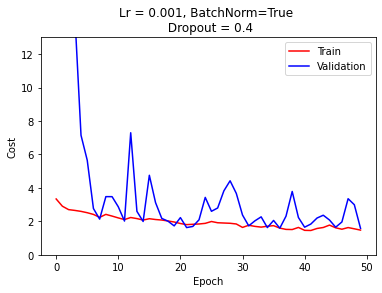

In [58]:
plt.plot(history.history['loss'], color='red')
plt.plot(history.history['val_loss'], color='blue')
plt.title('Lr = 0.001, BatchNorm=True \n Dropout = 0.4')
plt.ylabel('Cost')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper right')
plt.ylim(top=13)    # The instruction is used to limit the upper value of the loss function 
plt.ylim(bottom=0)  # The instruction is used to limit the lower value of the loss function
plt.show()

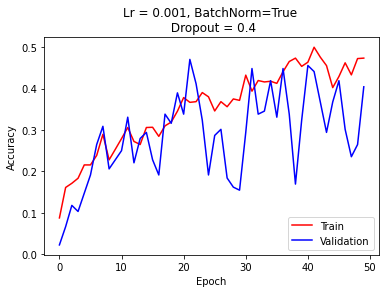

In [59]:
plt.plot(history.history['accuracy'], color='red')
plt.plot(history.history['val_accuracy'], color='blue')
plt.title('Lr = 0.001, BatchNorm=True \n Dropout = 0.4')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='lower right')
plt.show()

In [60]:
# Predicting the image associated to the each sample in the test set (X_test)
predictions = oxflower17_augm.predict(test_x)

In [61]:
print(type(predictions))
print(predictions.shape)

<class 'numpy.ndarray'>
(136, 17)


Prediction number= 8 , it corresponds to a Pansy

y = [0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]

y = 1 ; the sample 17 corresponds to a(an) Snowdrop


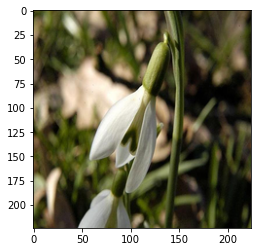

In [62]:
# Predicting the image associated to the sample 
# np.argmax returns the index of the maximum value
sample = 17
prediction = np.argmax(predictions[sample])
print("Prediction number=", prediction, ', it corresponds to a', dic[prediction])


# Plotting the content of a sample

plt.imshow(train_x[sample]);
print('\ny =',  np.squeeze(train_y[sample]))

for i in [i for i,x in enumerate(train_y[sample]) if x == 1]:
    print('')

print('y =',  i, ';', 'the sample', sample, 'corresponds to a(an)', dic[i])

<font size=5, color=blue>
    Data analysis

[NETRON](https://netron.app/)

<font size=5, color=blue>
    With Tensorboard

In [63]:
%tensorboard --logdir logs/oxflower17_augm
#logs\oxflower17_augm

<font size=5, color=blue>
The following command will find the tensorbroad process and terminate it:

<font size=4>
If you execute the above command, it would be impossible to use tensorboard for the analysis. 
    
The above command avoids the accumulation of information when the Learning Machine is trained again.
When you finish a notebook run, execute the command to stop the execution of the app tensorboard.

To get a better understanding of the command, run the notebook several times, without executing it.

<font size=4 >
Keras manages a global state, which it uses to implement the Functional model-building API and to uniquify autogenerated layer names.  
If you are creating many models in a loop, this global state will consume an increasing amount of memory over time, and you may want to clear it. Calling clear_session() releases the global state: this helps avoid clutter from old models and layers, especially when memory is limited.

In [64]:
tf.keras.backend.clear_session()